In [16]:
import sys
sys.path.append('../../')

from cad.calc.parameters import MbeyaShape
from cad.calc.mutation import ExploringMutator
from tqdm import tqdm
from cad.cadsd.cadsd import CADSD
import pickle
from experiments.db.generate_shapes import dbfile
from cad.calc.conv import note_to_freq, note_name, freq_to_note_and_cent, freq_to_wavelength
from tqdm import tqdm

db = pickle.load(open("db.pkl", "rb"))

In [33]:
notes = {note_name(note):[] for note in list(range(-35, -25))}

for i in tqdm(range(len(db))):
    geo, shape, cadsd = db[i]
    l=geo.geo[-1][0]
    
    for note in cadsd.get_notes()["note-name"]:
        if note in notes.keys():
            notes[note].append(l)

100%|██████████| 10000/10000 [10:37<00:00, 15.67it/s]


In [35]:
import seaborn as sns
import pandas as pd

df={"note": [], "length": []}
for note, l in notes.items():
    df["note"].extend([note]*len(l))
    df["length"].extend(l)
    
df = pd.DataFrame(df)
df

,note,length
0,A#1,1691.965150
1,A#1,1409.873694
2,A#1,1961.177470
3,A#1,1883.229051
4,A#1,2079.797516
...,...,...
6281,G1,1345.151328
6282,G1,1262.593993
6283,G1,964.118477
6284,G1,934.799338


<AxesSubplot: xlabel='note', ylabel='length'>

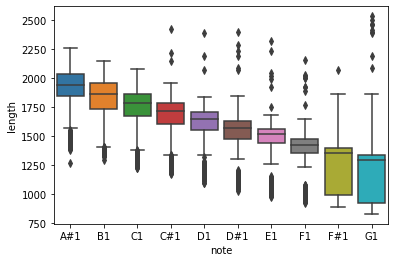

In [38]:
sns.boxplot(df, x="note", y="length")

<AxesSubplot: ylabel='length'>

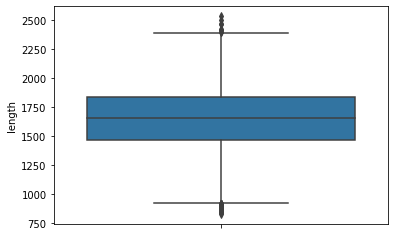

In [39]:
sns.boxplot(df, y="length")